# Regressions
## Jasmin Arensdorf 3-12-19
# Exploratory Analysis of Time Series Stock Data

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import datetime as dt
import requests

# render visualizations nicely
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
# comment out and see the warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
API_URL = 'https://api.iextrading.com/1.0'
STOCK = 'AAPL' #stock symbol for All State Insurance

In [4]:
# getting 5 years of data
res = requests.get(f'{API_URL}/stock/{STOCK}/chart/5y')
# an object dictionary of key value pairs
data = res.json()
# pd is pandas alias
# df is a dataframe
df = pd.DataFrame(data)

# sklearn deals with dates a little differently
# so let's convert the dates to timestamps
# gets the date column.  for every date value apply the function
# lambdas are anonymous functions.  lambda - argument is x.  for every date, pass in every date value, store in
# x, run the pd.Timestamp for the given date value.  returns a numeric value and this gets stored into date
df['date'] = df['date'].apply((lambda x: pd.Timestamp(x)))

In [5]:
# similar to df[:3]
df.head(3)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,0.068289,0.000000,0.097,70.4740,2014-03-12,70.5712,"Mar 12, 14",69.8686,70.1982,7170780,50195460,70.2864
1,-0.782734,-0.011106,-1.111,69.6913,2014-03-13,70.8746,"Mar 13, 14",69.4956,70.5830,9205087,64435609,70.1013
2,-0.782740,-0.022214,-1.123,68.9085,2014-03-14,69.7228,"Mar 14, 14",68.6866,69.4470,8471356,59299492,69.0354


In [6]:
df.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000
mean,0.086244,0.840535,0.086037,129.709877,130.803584,128.549510,129.680707,3.794291e+07,4.088383e+07,129.711826
std,2.138309,0.539423,1.541346,38.015284,38.371070,37.654450,38.015032,2.009106e+07,2.113181e+07,38.021375
min,-15.662800,-0.034755,-9.961000,68.024700,68.435700,67.153900,68.036500,5.704942e+06,1.147592e+07,57.336300
25%,-0.729321,0.437066,-0.597750,101.275775,102.210150,100.005075,101.244750,2.460836e+07,2.613966e+07,101.166075
50%,0.075421,0.656738,0.061500,116.756950,117.843100,115.924850,116.967850,3.361052e+07,3.555381e+07,116.848950
75%,1.052250,1.256713,0.860500,159.039575,160.595175,156.698475,159.402400,4.673783e+07,4.991158e+07,158.438050
max,11.084400,2.267523,8.198000,230.275400,231.664500,228.003100,228.995300,1.898463e+08,1.899781e+08,230.438500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null datetime64[ns]
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 118.0+ KB


In [8]:
# generate/store test and train data
X_train, X_test, Y_train, Y_test = train_test_split(df['date'], df['close'], test_size=0.3, random_state=42)

Text(0.5, 1.0, 'Training set')

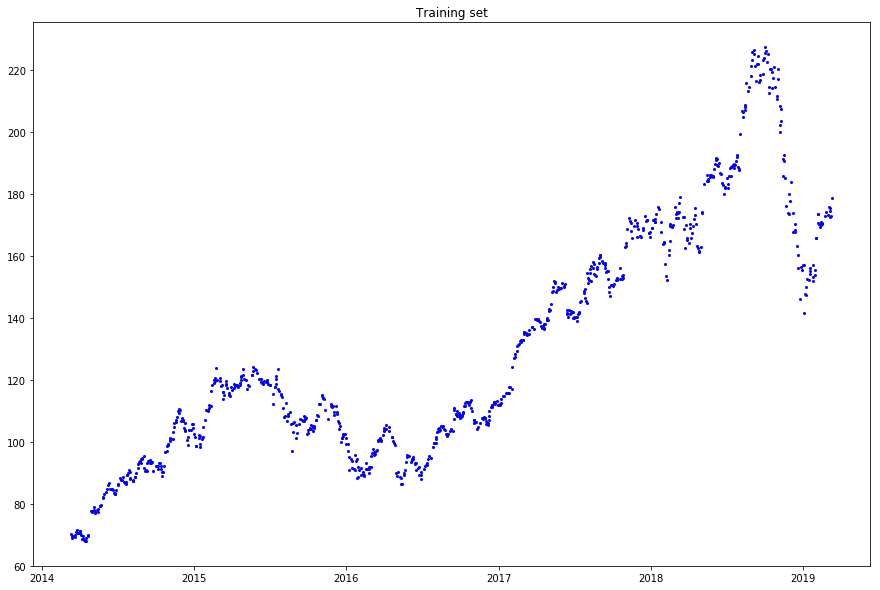

In [9]:
plt.figure(figsize=(15,10))
plt.plot(X_train, Y_train, 'bo', markersize=2)
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

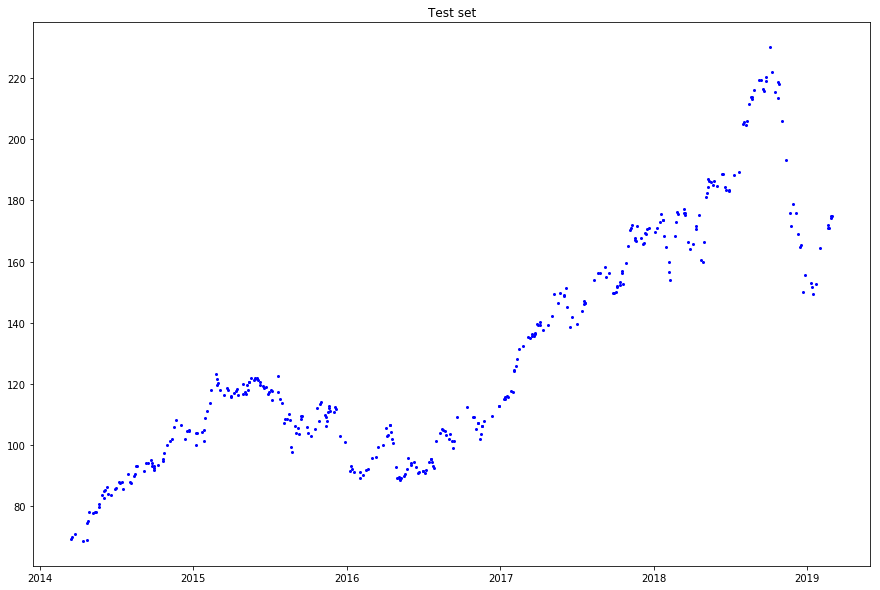

In [10]:
plt.figure(figsize=(15,10))
plt.plot(X_test, Y_test, 'bo', markersize=2)
plt.title('Test set')

In [11]:
# turns datetime values from x_train to ints representing years
X_years = [matplotlib.dates.date2num(x) for x in X_train]

coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 3)

In [12]:
# yet another date tweak to determine dimensions of horizontal line
X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 100000)

In [13]:
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

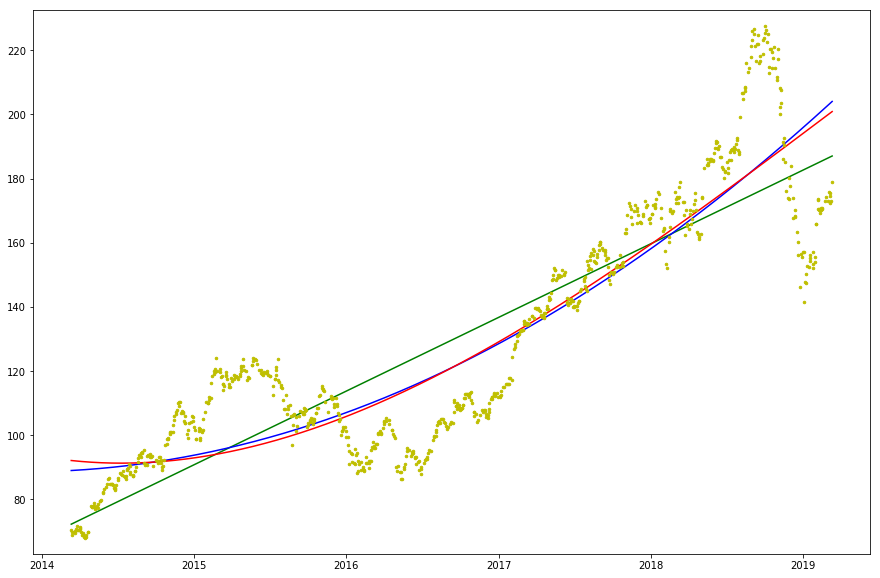

In [14]:
plt.figure(figsize=(15,10))
plt.ylim(min(Y_train - 5), max(Y_train + 5))
plt.plot(X_line, ffit_ln, 'g')
plt.plot(X_line, ffit_sq, 'b')
plt.plot(X_line, ffit_ten, 'r')

# see what happens with y vs y.
plt.plot(X_train, Y_train, 'y.', markersize=5)